In [98]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
covid_df = pd.read_csv('owid_covid_data.csv')

pd.options.display.max_rows = 4000

def missing_report_gen(covid_df):
    missing_values = covid_df.isnull().sum()
    missing_percent = (missing_values / len(covid_df)) * 100
    missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percent Missing': missing_percent})
    missing_report = missing_report[missing_report['Missing Values'] > 0]
    
    return missing_report

missing_report = missing_report_gen(covid_df)
missing_report

,Missing Values,Percent Missing
continent,26525,6.176721
total_cases,17631,4.105627
new_cases,19276,4.488689
new_cases_smoothed,20506,4.775111
total_deaths,17631,4.105627
new_deaths,18827,4.384133
new_deaths_smoothed,20057,4.670555
total_cases_per_million,17631,4.105627
new_cases_per_million,19276,4.488689
new_cases_smoothed_per_million,20506,4.775111


#### Data Preprocessing
---

In [100]:
# Removing columns 
high_missing_cols = covid_df.columns[covid_df.isnull().mean() > 0.90]
medium_missing_cols = covid_df.columns[(covid_df.isnull().mean() > 0.50) & (covid_df.isnull().mean() <= 0.90)]

covid_df_clean = covid_df.drop(columns=high_missing_cols).drop(columns=medium_missing_cols)

missing_report_clean = missing_report_gen(covid_df_clean)
missing_report_clean

,Missing Values,Percent Missing
continent,26525,6.176721
total_cases,17631,4.105627
new_cases,19276,4.488689
new_cases_smoothed,20506,4.775111
total_deaths,17631,4.105627
new_deaths,18827,4.384133
new_deaths_smoothed,20057,4.670555
total_cases_per_million,17631,4.105627
new_cases_per_million,19276,4.488689
new_cases_smoothed_per_million,20506,4.775111


#### Feature Selection and Derivation


In [101]:
covid_df_clean['case_fatality_rate'] = covid_df_clean['total_deaths'] / covid_df_clean['total_cases']
covid_df_clean['log_total_cases'] = np.log1p(covid_df_clean['total_cases'])
covid_df_clean['log_total_deaths'] = np.log1p(covid_df_clean['total_deaths'])

### Exploratory Data Analysis
---

#### Visualizations

        total_cases  total_deaths  gdp_per_capita  life_expectancy
count  4.118040e+05  4.118040e+05   328292.000000    390299.000000
mean   7.365292e+06  8.125957e+04    18904.182986        73.702098
std    4.477582e+07  4.411901e+05    19829.578099         7.387914
min    0.000000e+00  0.000000e+00      661.240000        53.280000
25%    6.280750e+03  4.300000e+01     4227.630000        69.500000
50%    6.365300e+04  7.990000e+02    12294.876000        75.050000
75%    7.582720e+05  9.574000e+03    27216.445000        79.460000
max    7.758668e+08  7.057132e+06   116935.600000        86.750000


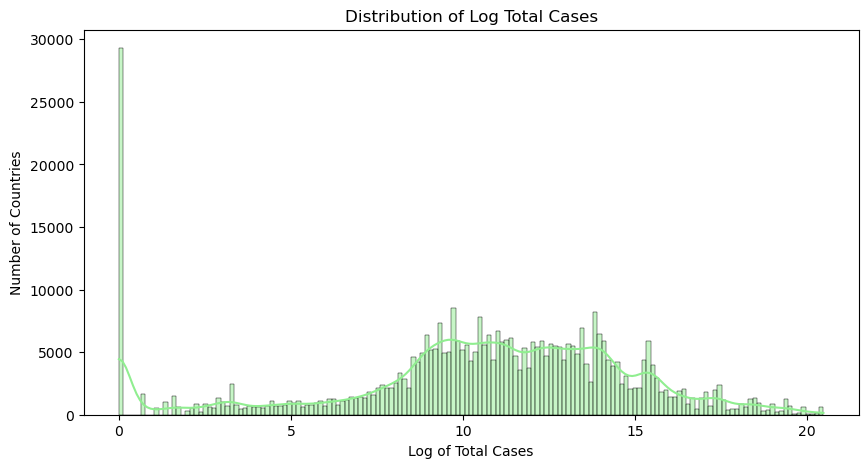

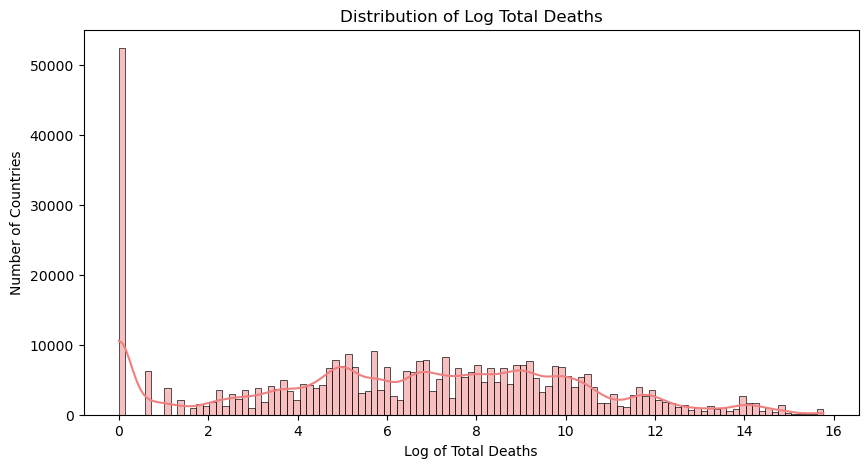

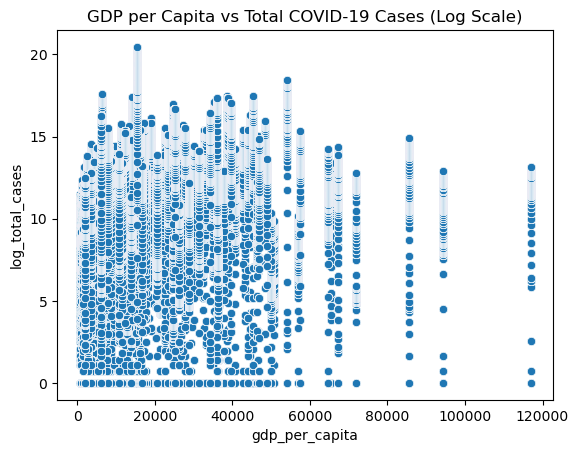

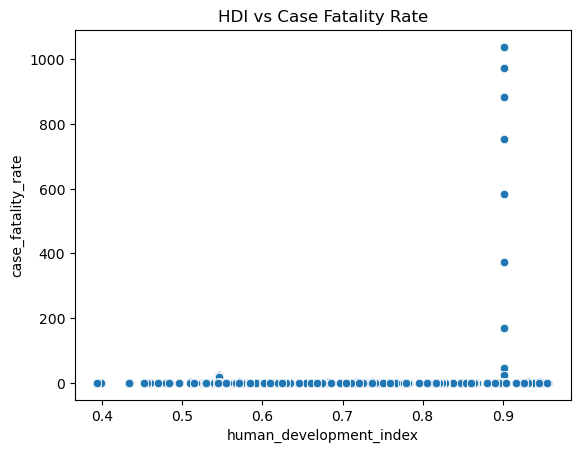

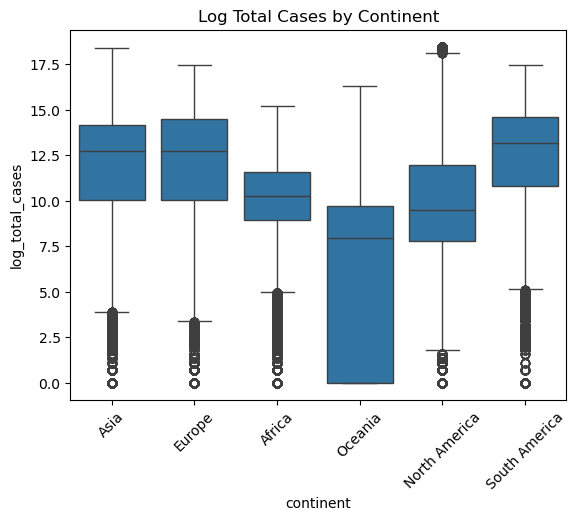

In [102]:
# Summary statistics for key variables
print(covid_df_clean[['total_cases', 'total_deaths', 'gdp_per_capita', 'life_expectancy']].describe())

# Histograms for total_cases and total_deaths
plt.figure(figsize=(10, 5))
sns.histplot(covid_df_clean['log_total_cases'], kde=True, color='lightgreen')
plt.title('Distribution of Log Total Cases')
plt.xlabel('Log of Total Cases')
plt.ylabel('Number of Countries')
plt.tight_layout
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(covid_df_clean['log_total_deaths'], kde=True, color='lightcoral')
plt.title('Distribution of Log Total Deaths')
plt.xlabel('Log of Total Deaths')
plt.ylabel('Number of Countries')
plt.tight_layout
plt.show()

# Scatterplots
sns.scatterplot(x='gdp_per_capita', y='log_total_cases', data=covid_df_clean)
plt.title('GDP per Capita vs Total COVID-19 Cases (Log Scale)')
plt.show()

sns.scatterplot(x='human_development_index', y='case_fatality_rate', data=covid_df_clean)
plt.title('HDI vs Case Fatality Rate')
plt.show()


# Boxplot for total_cases by continent
sns.boxplot(x='continent', y='log_total_cases', data=covid_df_clean)
plt.xticks(rotation=45)
plt.title('Log Total Cases by Continent')
plt.show()


#### Correlation Analysis

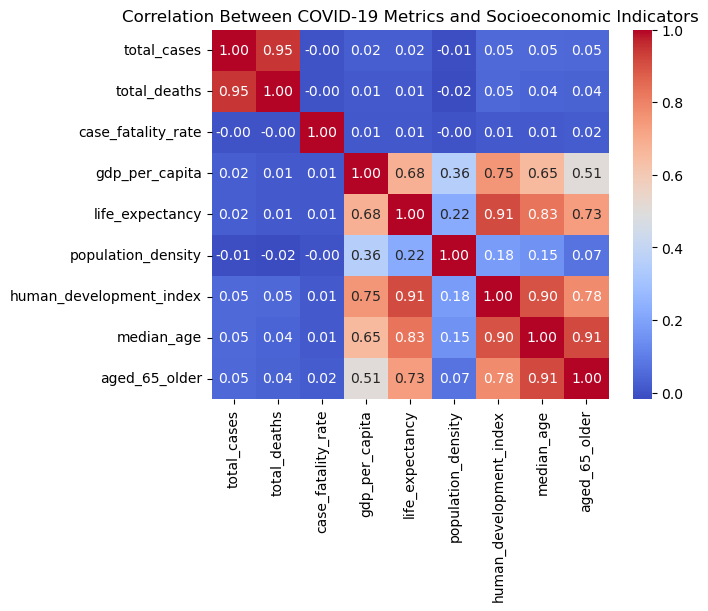

In [103]:
corr_vars = [
    'total_cases', 'total_deaths', 'case_fatality_rate',
    'gdp_per_capita', 'life_expectancy', 'population_density',
    'human_development_index', 'median_age', 'aged_65_older'
]

sns.heatmap(covid_df_clean[corr_vars].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between COVID-19 Metrics and Socioeconomic Indicators')
plt.show()

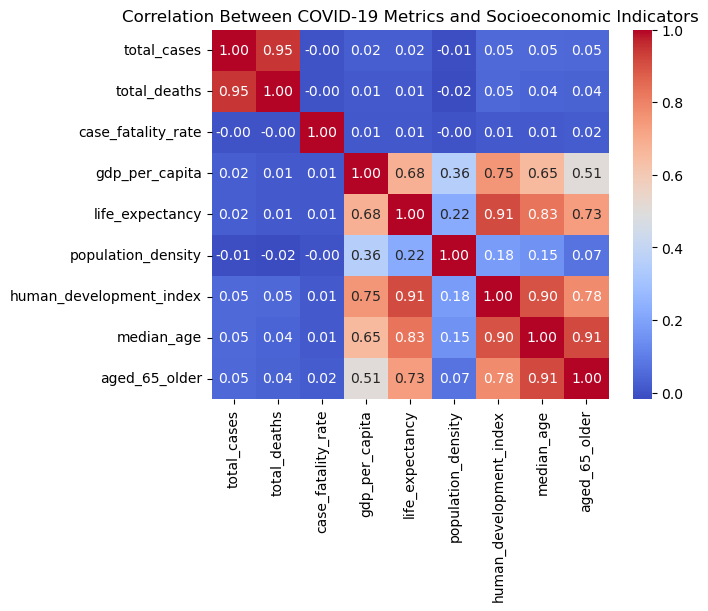

In [104]:
corr_vars = [
    'total_cases', 'total_deaths', 'case_fatality_rate',
    'gdp_per_capita', 'life_expectancy', 'population_density',
    'human_development_index', 'median_age', 'aged_65_older'
]

sns.heatmap(covid_df_clean[corr_vars].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between COVID-19 Metrics and Socioeconomic Indicators')
plt.show()

\newpage

# Uncovering Response Patterns: Clustering Analysis of Global COVID-19 Data

## Clustering Methodology: K-means, DBSCAN & Hierarchical Approaches

This section leverages three complementary clustering techniques: K-means, DBSCAN, and agglomerative hierarchical clustering to uncover groups of countries whose COVID-19 trajectories and outcomes share similar patterns. After normalizing key pandemic indicators alongside socioeconomic variables, K-means partitions nations into compact clusters; DBSCAN identifies dense “hotspots” of similar response profiles while handling outliers; and hierarchical clustering builds a nested tree of country groupings without prespecifying the number of clusters. Together, these methods provide a robust foundation for revealing how underlying social and economic factors shaped the global progression of the pandemic.

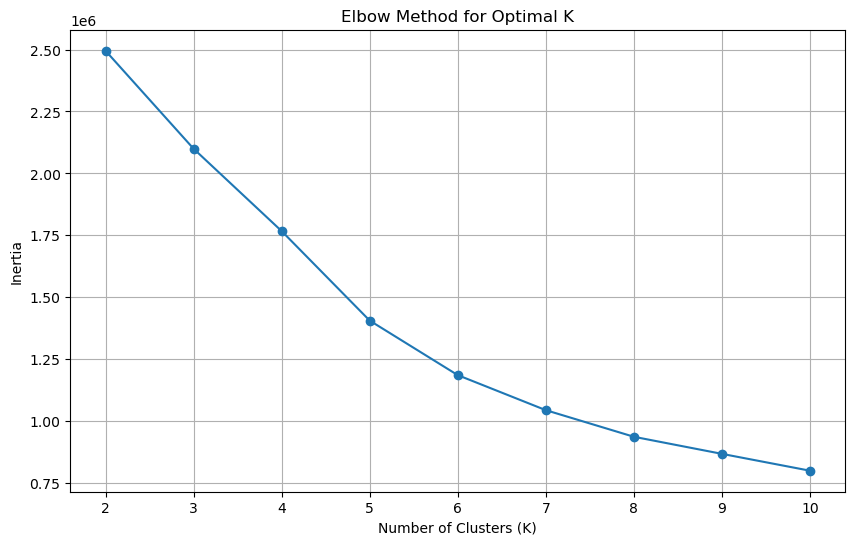

In [105]:
# -=-=-= Data for clustering -=-=-=-
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant features for clustering
clustering_features = [
     'total_cases_per_million',
     'total_deaths_per_million',
     'case_fatality_rate',
     'gdp_per_capita',
     'hospital_beds_per_thousand',
     'median_age',
     'population_density',
     'human_development_index'
 ]

covid_clustering_data = covid_df_clean[clustering_features].copy()
covid_clustering_data.replace([np.inf, -np.inf], np.nan, inplace=True)
means = covid_clustering_data.mean()
covid_clustering_data.fillna(means, inplace=True)

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(covid_clustering_data)
scaled_df = pd.DataFrame(scaled_features, columns=covid_clustering_data.columns)

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(2, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) #  n_init for stability
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Based on the elbow plot (could be 3 also)
optimal_k = 4


Observing the elbow plot, a distinct bend occurs around $K=3$ or $K=4$. Prior to this point, there is a steep decline in inertia, suggesting that increasing the number of clusters significantly reduces inter-cluster variance. However, beyond $K=4$, the decrease in inertia becomes less pronounced, indicating that adding more clusters provides diminishing returns in terms of reducing the overall dispersion within the clusters. Therefore, based on the Elbow method, the optimal number of clusters for this K-means analysis is likely 4.

In [106]:
# -=-=-= Use k-means to partition nations into compact clusters -=-=-=-

# Apply K-means 
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
covid_df_clean['kmeans_cluster'] = kmeans_final.fit_predict(scaled_df)

# Analyze the cluster
print("\nCluster Characteristics:")
cluster_analysis = covid_df_clean.groupby('kmeans_cluster')[clustering_features].mean()
print(cluster_analysis)


Cluster Characteristics:
                total_cases_per_million  total_deaths_per_million  \
kmeans_cluster                                                      
0                          15858.477946                190.080852   
1                          67052.156904                562.889669   
2                              0.249000                210.761400   
3                         334843.207879               2270.940005   

                case_fatality_rate  gdp_per_capita  \
kmeans_cluster                                       
0                              inf     4212.341370   
1                              inf    22804.691057   
2                       846.700000    38605.671000   
3                         0.010272    37847.205980   

                hospital_beds_per_thousand  median_age  population_density  \
kmeans_cluster                                                               
0                                 1.290113   21.260150          132.761139   


In [107]:
## -=-=-= Use DBSCAN to identify dense "hotspots" of similar response profiles -=-=-=-
from sklearn.cluster import DBSCAN

# Get the latest values for each country for the selected features
latest_covid_data = covid_df_clean.groupby('location')[clustering_features].last().dropna()
latest_covid_data.replace([np.inf, -np.inf], np.nan, inplace=True)
latest_covid_data.fillna(latest_covid_data.mean(), inplace=True)

# Scale the data
scaler_dbscan = StandardScaler()
scaled_features_dbscan = scaler_dbscan.fit_transform(latest_covid_data)
scaled_df_dbscan = pd.DataFrame(scaled_features_dbscan, index=latest_covid_data.index, columns=latest_covid_data.columns)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=3) # 0.7, 3
clusters_dbscan = dbscan.fit_predict(scaled_df_dbscan)

latest_covid_data['dbscan_cluster'] = clusters_dbscan

# Analyze the DBSCAN clusters
print("\nDBSCAN Cluster Analysis:")
print(latest_covid_data['dbscan_cluster'].value_counts())

# -1 represents outliers
print("\nCharacteristics of non-outlier clusters (excluding -1):")
non_outlier_clusters_dbscan = latest_covid_data[latest_covid_data['dbscan_cluster'] != -1]
if not non_outlier_clusters_dbscan.empty:
    print(non_outlier_clusters_dbscan.groupby('dbscan_cluster')[clustering_features].mean())
else:
    print("No non-outlier clusters found with the current parameters.")



DBSCAN Cluster Analysis:
dbscan_cluster
-1    92
 0    44
 1    11
 4     4
 2     3
 5     3
 3     3
Name: count, dtype: int64

Characteristics of non-outlier clusters (excluding -1):
                total_cases_per_million  total_deaths_per_million  \
dbscan_cluster                                                      
0                          18328.930705                247.111364   
1                         103883.461909               1286.493636   
2                         132359.418667               2841.654333   
3                           6515.386000                 62.856667   
4                         499240.247500               3825.775500   
5                         530138.726667                804.552000   

                case_fatality_rate  gdp_per_capita  \
dbscan_cluster                                       
0                         0.016546     4445.105864   
1                         0.013377    11564.839455   
2                         0.022186    12735.

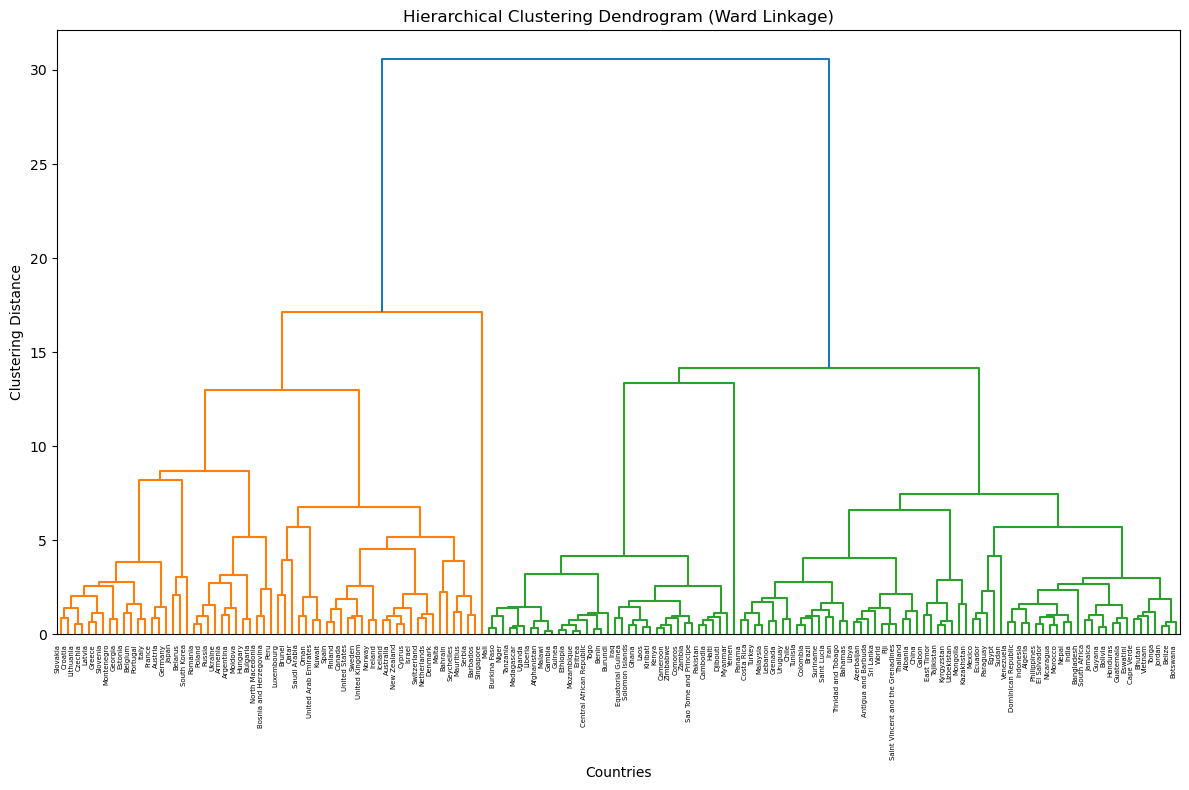


Cluster Assignments with 3 Clusters:
hierarchical_cluster_n
0    99
1    60
2     1
Name: count, dtype: int64

Characteristics of Hierarchical Clusters (with 3 clusters):
                        total_cases_per_million  total_deaths_per_million  \
hierarchical_cluster_n                                                      
0                                  64253.114515                787.619586   
1                                 356648.123683               2497.399217   
2                                 532073.560000                358.237000   

                        case_fatality_rate  gdp_per_capita  \
hierarchical_cluster_n                                       
0                                 0.017626     9040.960121   
1                                 0.009562    36249.296850   
2                                 0.000673    85535.383000   

                        hospital_beds_per_thousand  median_age  \
hierarchical_cluster_n                                           

In [110]:
# -=-=-= use hierarchical clustering to build country groupings without prespecifying the number of clusters -=-=-=
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Get the latest values for each country for the selected features
latest_covid_data_hc = covid_df_clean.groupby('location')[clustering_features].last().dropna()
latest_covid_data_hc.replace([np.inf, -np.inf], np.nan, inplace=True)
latest_covid_data_hc.fillna(latest_covid_data_hc.mean(), inplace=True)

# Scale the data
scaler_hc = StandardScaler()
scaled_features_hc = scaler_hc.fit_transform(latest_covid_data_hc)
scaled_df_hc = pd.DataFrame(scaled_features_hc, index=latest_covid_data_hc.index, columns=latest_covid_data_hc.columns)

# Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
clusters_hierarchical = hierarchical_clustering.fit_predict(scaled_df_hc)
latest_covid_data_hc['hierarchical_cluster'] = clusters_hierarchical

cluster_analysis_hierarchical = latest_covid_data_hc.groupby('hierarchical_cluster')[clustering_features].mean()

# Dendrogram
linked = linkage(scaled_df_hc, 'ward')

plt.figure(figsize=(12, 8))
dendrogram(linked,
            orientation='top',
            labels=latest_covid_data_hc.index.tolist(), 
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Countries')
plt.ylabel('Clustering Distance')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

n_clusters_choice = 3
hierarchical_clustering_n = AgglomerativeClustering(n_clusters=n_clusters_choice, linkage='ward')
clusters_n = hierarchical_clustering_n.fit_predict(scaled_df_hc)
latest_covid_data_hc['hierarchical_cluster_n'] = clusters_n

print(f"\nCluster Assignments with {n_clusters_choice} Clusters:")
print(latest_covid_data_hc['hierarchical_cluster_n'].value_counts().sort_index())

print(f"\nCharacteristics of Hierarchical Clusters (with {n_clusters_choice} clusters):")
cluster_analysis_n = latest_covid_data_hc.groupby('hierarchical_cluster_n')[clustering_features].mean()
print(cluster_analysis_n)

## Cluster Evaluation Metrics: Purity and Sum of Squared Errors

## Socioeconomic Profiling of Clusters

## Parameter Tuning for Optimal Clustering